In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import mylibrary.datasets as datasets
%matplotlib inline

In [2]:
mnist = datasets.MNIST()
train_data, train_label_, test_data, test_label_ = mnist.load()

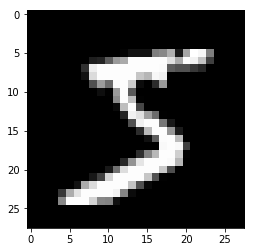

In [3]:
plt.imshow(train_data[0].reshape(28,28), cmap='gray')

In [4]:
train_data = train_data / 255.
test_data = test_data / 255.

input_size = 784
hidden_1 = 5
output_size = 10

learning_rate = 0.0005
batch_size = 64#300

train_label = tnn.Logits.index_to_logit(train_label_)
train_size = len(train_label)

In [5]:
optimizer = tnn.Adam(learning_rate)
layer1 = tnn.NonLinearLayer(input_size, hidden_1, optimizer=optimizer)
# layer1 = tsp.SplineMatrixLayer(input_size, hidden_1, max_points=3)
# layer2 = tnn.SplineVectorLayer(hidden_1, max_points=3, optimizer=optimizer)
layer2 = tsp.SplineMatrixLayer(hidden_1, output_size, max_points=3)
layer3 = tnn.Softmax()

In [6]:
accuracy_list = []
for epoch in range(20):
    for index in range(train_size // batch_size):
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]

        a1 = layer1.forward(train_x)
        a2 = layer2.forward(a1)
        yout = layer3.forward(a2)

        dy = tnn.CrossEntropyLoss.del_loss(yout, train_y)
        loss = tnn.CrossEntropyLoss.loss(yout, train_y)

        da2 = layer3.backward(dy)
        da1 = layer2.backward(da2)
        dx = layer1.backward(da1)

        layer1.update()
        layer2.update()
        layer3.update()
        
        if index % 100 == 0:
#             layer1._maintain_good_spline_()
            layer2._maintain_good_spline_()
#             layer3._maintain_good_spline_()
            
            
            print('\nTRAIN',index, '-> ', loss)
            a1 = layer1.forward(train_data)
            a2 = layer2.forward(a1)
            yout = layer3.forward(a2)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(train_label_)).sum()

            accuracy = correct / len(train_label_) * 100.
            print('EPOCH = ',epoch,'accuracy = ', accuracy)
            print(correct, '/', len(train_label_))
            
            a1 = layer1.forward(test_data)
            a2 = layer2.forward(a1)
            yout = layer3.forward(a2)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(test_label_)).sum()

            accuracy = correct / len(test_label_) * 100.
            print('   TEST  ','accuracy = ', accuracy)
            print(correct, '/', len(test_label_))            


TRAIN 0 ->  2.9389825267680143
EPOCH =  0 accuracy =  8.115
4869 / 60000
   TEST   accuracy =  8.42
842 / 10000

TRAIN 100 ->  1.7599273606272385
EPOCH =  0 accuracy =  44.07833333333333
26447 / 60000
   TEST   accuracy =  44.14
4414 / 10000

TRAIN 200 ->  1.517233710988878
EPOCH =  0 accuracy =  52.23
31338 / 60000
   TEST   accuracy =  52.73
5273 / 10000

TRAIN 300 ->  1.457753210627038
EPOCH =  0 accuracy =  57.415000000000006
34449 / 60000
   TEST   accuracy =  58.74
5874 / 10000

TRAIN 400 ->  1.393904619952095
EPOCH =  0 accuracy =  59.975
35985 / 60000
   TEST   accuracy =  61.4
6140 / 10000

TRAIN 500 ->  1.3799092048158226
EPOCH =  0 accuracy =  61.26166666666667
36757 / 60000
   TEST   accuracy =  62.17
6217 / 10000

TRAIN 600 ->  1.171361811912813
EPOCH =  0 accuracy =  63.13666666666666
37882 / 60000
   TEST   accuracy =  64.05
6405 / 10000

TRAIN 700 ->  1.1687233368043102
EPOCH =  0 accuracy =  64.45666666666666
38674 / 60000
   TEST   accuracy =  65.33
6533 / 10000

TRA

EPOCH =  6 accuracy =  81.595
48957 / 60000
   TEST   accuracy =  82.14
8214 / 10000

TRAIN 500 ->  0.7670054221673053
EPOCH =  6 accuracy =  81.41833333333334
48851 / 60000
   TEST   accuracy =  81.83
8183 / 10000

TRAIN 600 ->  0.5526788155470926
EPOCH =  6 accuracy =  81.69999999999999
49020 / 60000
   TEST   accuracy =  82.19999999999999
8220 / 10000

TRAIN 700 ->  0.7352106565298697
EPOCH =  6 accuracy =  81.81166666666667
49087 / 60000
   TEST   accuracy =  82.15
8215 / 10000

TRAIN 800 ->  0.7037755015113223
EPOCH =  6 accuracy =  81.70166666666667
49021 / 60000
   TEST   accuracy =  82.3
8230 / 10000

TRAIN 900 ->  0.8517130302328151
EPOCH =  6 accuracy =  81.89
49134 / 60000
   TEST   accuracy =  82.41000000000001
8241 / 10000

TRAIN 0 ->  0.783579392432515
EPOCH =  7 accuracy =  81.58666666666666
48952 / 60000
   TEST   accuracy =  82.21000000000001
8221 / 10000

TRAIN 100 ->  0.5975098845696567
EPOCH =  7 accuracy =  81.73
49038 / 60000
   TEST   accuracy =  82.0200000000000


TRAIN 700 ->  0.6768399357505137
EPOCH =  12 accuracy =  84.36833333333334
50621 / 60000
   TEST   accuracy =  84.17999999999999
8418 / 10000

TRAIN 800 ->  0.6524501752429938
EPOCH =  12 accuracy =  84.39166666666667
50635 / 60000
   TEST   accuracy =  84.28999999999999
8429 / 10000

TRAIN 900 ->  0.6969795976795696
EPOCH =  12 accuracy =  84.50333333333333
50702 / 60000
   TEST   accuracy =  84.31
8431 / 10000

TRAIN 0 ->  0.648200066031956
EPOCH =  13 accuracy =  84.175
50505 / 60000
   TEST   accuracy =  84.06
8406 / 10000

TRAIN 100 ->  0.47692101598107256
EPOCH =  13 accuracy =  84.33166666666668
50599 / 60000
   TEST   accuracy =  84.24000000000001
8424 / 10000

TRAIN 200 ->  0.6685335878603383
EPOCH =  13 accuracy =  84.58166666666666
50749 / 60000
   TEST   accuracy =  84.28999999999999
8429 / 10000

TRAIN 300 ->  0.7439276328676796
EPOCH =  13 accuracy =  84.485
50691 / 60000
   TEST   accuracy =  84.24000000000001
8424 / 10000

TRAIN 400 ->  0.701996020701169
EPOCH =  13 ac


TRAIN 0 ->  0.5930372687574073
EPOCH =  19 accuracy =  85.32833333333333
51197 / 60000
   TEST   accuracy =  85.0
8500 / 10000

TRAIN 100 ->  0.4130900297857634
EPOCH =  19 accuracy =  85.60166666666666
51361 / 60000
   TEST   accuracy =  85.14
8514 / 10000

TRAIN 200 ->  0.6151228932463713
EPOCH =  19 accuracy =  85.74166666666667
51445 / 60000
   TEST   accuracy =  85.17
8517 / 10000

TRAIN 300 ->  0.6956953095900128
EPOCH =  19 accuracy =  85.61166666666666
51367 / 60000
   TEST   accuracy =  85.16
8516 / 10000

TRAIN 400 ->  0.6625195308150416
EPOCH =  19 accuracy =  85.79666666666667
51478 / 60000
   TEST   accuracy =  85.28999999999999
8529 / 10000

TRAIN 500 ->  0.658688736139571
EPOCH =  19 accuracy =  85.65833333333333
51395 / 60000
   TEST   accuracy =  85.38
8538 / 10000

TRAIN 600 ->  0.44405152620549804
EPOCH =  19 accuracy =  85.74000000000001
51444 / 60000
   TEST   accuracy =  85.28999999999999
8529 / 10000

TRAIN 700 ->  0.6257680400379588
EPOCH =  19 accuracy =  85.8

In [7]:
# layer2._increase_pieces_()

In [18]:
a1 = layer1.forward(train_data)
a2 = layer2.forward(a1)
yout = layer3.forward(a2)

dy = tnn.CrossEntropyLoss.del_loss(yout, train_label)
loss = tnn.CrossEntropyLoss.loss(yout, train_label)

da2 = layer3.backward(dy)
da1 = layer2.backward(da2)
dx = layer1.backward(da1)

In [19]:
layer2.input.shape, layer2.output.shape

((60000, 5), (60000, 10))

In [26]:
i=0

0


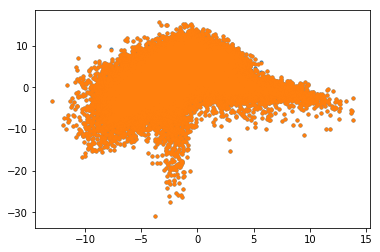

In [27]:
a1 = layer2.input
a2 = layer2.output
a2_ = layer2.output - layer2.del_output
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
print(i)
i+=1

In [29]:
layer2.del_output.max(), layer2.del_output.mean(), layer2.del_output.min(), 

(0.14814814813793994, -5.117004556096734e-05, -0.14814814812002192)

## Using large number of spline units

In [13]:
# optimizer = tnn.Adam(learning_rate)
# layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
# layer2 = spline.SplineVectorLayer(hidden_1, max_points=7)  # 2 -> Linear; 3 -> DoubleRelu
# layer3 = tnn.NonLinearLayer(hidden_1, output_size, activation=tnn.Softmax(), optimizer=optimizer)

# accuracy_list = []
# for epoch in range(20):
#     for index in range(train_size // batch_size):
#         train_x = train_data[index * batch_size:(index + 1) * batch_size]
#         train_y = train_label[index * batch_size:(index + 1) * batch_size]

#         a1 = layer1.forward(train_x)
#         a2 = layer2.forward(a1)
#         yout = layer3.forward(a2)

#         dy = tnn.CrossEntropyLoss.del_loss(yout, train_y)
#         loss = tnn.CrossEntropyLoss.loss(yout, train_y)

#         da2 = layer3.backward(dy)
#         da1 = layer2.backward(da2)
#         dx = layer1.backward(da1)

#         layer1.update()
#         layer2.update(learning_rate=0.1)
#         layer3.update()
        
#         if index % 100 == 0:
#             layer2._maintain_good_spline_()
            
#             print('\nTRAIN',index, '-> ', loss)
#             a1 = layer1.forward(train_data)
#             a2 = layer2.forward(a1)
#             yout = layer3.forward(a2)
#             outputs = tnn.Logits.logit_to_index(yout)
#             correct = (outputs == np.array(train_label_)).sum()

#             accuracy = correct / len(train_label_) * 100.
#             print('EPOCH = ',epoch,'accuracy = ', accuracy)
#             print(correct, '/', len(train_label_))
            
#             a1 = layer1.forward(test_data)
#             a2 = layer2.forward(a1)
#             yout = layer3.forward(a2)
#             outputs = tnn.Logits.logit_to_index(yout)
#             correct = (outputs == np.array(test_label_)).sum()

#             accuracy = correct / len(test_label_) * 100.
#             print('   TEST  ','accuracy = ', accuracy)
#             print(correct, '/', len(test_label_))            

In [14]:
# a1 = layer1.forward(train_data)
# a2 = layer2.forward(a1)
# yout = layer3.forward(a2)

# dy = tnn.CrossEntropyLoss.del_loss(yout, train_label)
# loss = tnn.CrossEntropyLoss.loss(yout, train_label)

# da2 = layer3.backward(dy)
# da1 = layer2.backward(da2)
# dx = layer1.backward(da1)

In [15]:
# i=0
# layer2.input.shape, layer2.output.shape

In [16]:
# a1 = layer2.input
# a2 = layer2.output
# a2_ = layer2.output - layer2.del_output
# plt.scatter(a1[:, i], a2_[:, i], marker='.')
# plt.scatter(a1[:, i], a2[:, i], marker='.')
# print(i)
# i+=1

In [17]:
# layer2.del_output.max()